In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
(train_x, trin_y), (test_x, test_y) = mnist.load_data()

In [3]:
class_img_mapping = dict()

for i in range(50000):
    class_id = trin_y[i]
    img_id = i
    tmp_list = class_img_mapping.get(class_id, [])
    tmp_list.append(img_id)
    class_img_mapping[class_id] = tmp_list
    
for k, v in class_img_mapping.items():
    print (k, len(v))

0 4932
1 5678
2 4968
3 5101
4 4859
5 4506
6 4951
7 5175
8 4842
9 4988


In [7]:
mnist_triplet_dataset = []

class_number = 10

for cntr in tqdm(range(5000)) :
    for cls_id in range(class_number):
        pos_cls_id = cls_id

        neg_cls_id_list = set(range(class_number))
        neg_cls_id_list.remove(cls_id)

        pos_list = class_img_mapping[pos_cls_id]
        a, p = random.sample(pos_list, 2)

        neg_list = class_img_mapping[random.choice(list(neg_cls_id_list) )]
        n = random.choice(neg_list)
        
        a_img, p_img, n_img = train_x[a], train_x[p], train_x[n]
        mnist_triplet_dataset.append([a_img, p_img, n_img])
#         break
#     break

np.save('mnist_triplet_dataset.npy', np.array(mnist_triplet_dataset))

100%|██████████| 5000/5000 [00:00<00:00, 7807.72it/s]


In [9]:
print(len(mnist_triplet_dataset))

50000


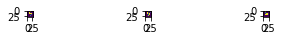

In [6]:
fig = plt.figure()
row_number = 30

for indx, img_data in enumerate (mnist_triplet_dataset[1:30]):
    a_img, p_img, n_img = img_data
    indx = cls_id * 3
    plt.subplot(row_number, 3, indx+1)
    plt.imshow(a_img)
    plt.subplot(row_number, 3, indx+2)
    plt.imshow(p_img)
    plt.subplot(row_number, 3, indx+3)
    plt.imshow(n_img)
    
plt.show()